In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
from datetime import datetime

import utils as ut
from improc import *
import policy_time as pt

In [8]:
import model_based_agent as mba

def change_reward_ahead(df,reward_ahead,jump_limit=100):
    # Takes a dataframe where reward_ahead setting was 1.
    # Rewrites reward column using new reward_ahead
    # Returns dataframe at the end.
    start_inds = [0]
    for i in range(len(df)-1):
        if pt_dist(df['loc'][i],df['loc'][i+1]) > 10:
            start_inds.append(i+1)

    new_df = pd.DataFrame(columns=df.columns)
    for i in range(len(start_inds)-1):
        new_sec = df.iloc[start_inds[i]:start_inds[i+1]-reward_ahead].copy()
        new_r = [np.sum(dh.df['reward'][start_inds[i]+j:start_inds[i]+j+reward_ahead]) 
                     for j in range(len(new_sec))]
        new_sec['reward'] = new_r
        new_df = new_df.append(new_sec)
    return new_df,start_inds

def plot_mods(models,vmin=None,vmax=None):
    fig,ax = plt.subplots(len(models),7)
    fig.set_size_inches((15,2*len(models)))
    for m,mod in enumerate(models):
        for i,(key,item) in enumerate(mod.items()):
            if i<4:
                img = ax[m,i].imshow(item[:,:,0],vmin=-180,vmax=180)
            else:
                img = ax[m,i].imshow(item[:,:,0],vmin=vmin,vmax=vmax)
            cbar = fig.colorbar(img,ax=ax[m,i])
            ax[m,i].axis('off')
            #cbar.set_ticks([])
            if m==0:
                ax[m,i].set_title(f'{len(models)} models: {key}')
        ax[m,6].imshow(np.sign(mod['reward_on'][:,:,0]-mod['reward_off'][:,:,0]),vmin=-1,vmax=1)

In [2]:
folder = './Data/Rand09-02-12-06/'
dh = mba.DataHandler()
reward_ahead = 30
dh.load_df(f'{folder}df.pkl')
df_n, st_inds= change_reward_ahead(dh.df,reward_ahead)
mins = 10
pts = mins*300
dh.df = df_n[:pts]
dh.params['reward_ahead']=reward_ahead

In [5]:
# Parameters
init_episodes = 5
fbase = 'traj'
params = {
    'reward_ahead': 30,
    'timestep_gap': 1,
    'prev_act_window': 3,
    'jump_limit': 100,
}
sm_pars = {'lambda': .1, 'iters': 10}
lp_frac = .4


# # Set up folder and collect initial random trajectory
# folder = './Data/Pol'+datetime.now().strftime('%d-%m-%H-%M')+'/'
# if os.path.isdir(folder):
#     raise ValueError('Folder already exists.')
# os.mkdir(folder)
# worm = we.ProcessedWorm(0,ep_len=120) # Each worm episode will be 2 minutes long
# fnames=[]
# fnames.append(f'{folder}{fbase}0.pkl')
# pt.get_init_traj(fname, worm, init_episodes, act_rate=3)


# Make dataframe
# dh = pt.DataHandler(params)
# dh.add_dict_to_df([fname])
# Get policy
mod, counts, policy = pt.get_mod_and_policy(dh.df, sm_pars=sm_pars, lp_frac=lp_frac)
pol_dist = (counts/np.sum(counts))*policy

Penalty -0.3642956292503186


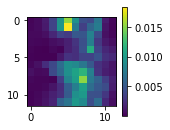

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(pol_dist)
plt.colorbar();

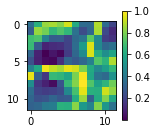

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(policy)
plt.colorbar();

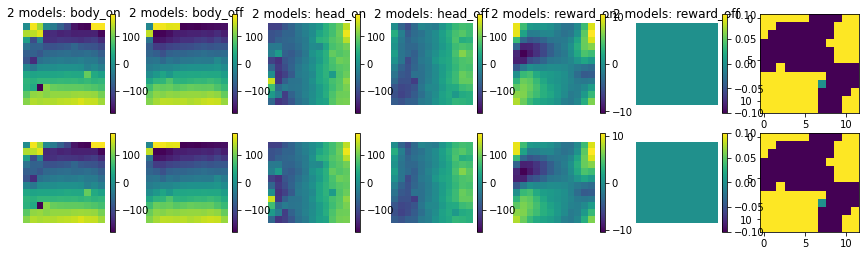

In [9]:
plot_mods([mod,mod])